In [0]:
# %tensorflow_version 1.x

In [0]:
import tensorflow as tf

In [0]:
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools

In [0]:
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid']=False

In [0]:
# import numpy as np
# import urllib
# import cv2
# # METHOD #1: OpenCV, NumPy, and urllib
# def url_to_image(url):
# 	# download the image, convert it to a NumPy array, and then read
# 	# it into OpenCV format
# 	resp = urllib.urlopen(url)
# 	image = np.asarray(bytearray(resp.read()), dtype="uint8")
# 	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# 	# return the image
# 	return image

In [0]:
#visualizing the input

def load_img(path_to_img):
  max_dim=512
  img=tf.io.read_file(path_to_img)
  img=tf.io.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)

  shape=tf.cast(tf.shape(img)[:-1],tf.float32)
  long_dim=max(shape)
  scale=max_dim/long_dim
  new_shape=tf.cast(shape*scale,tf.int32)

  img=tf.image.resize(img, new_shape)
  img=img[tf.newaxis, :]
  return img

In [0]:
import matplotlib.pyplot as plt
b=plt.imread('/content/2.jpeg')
# plt.imshow(b)

In [227]:
style_image= load_img('/content/6.jpg')
content_image=load_img('/content/5.jpeg')
print(style_image.shape)
print(content_image.shape)

(1, 288, 512, 3)
(1, 512, 384, 3)


In [0]:
# # content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# # style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
# # print(content_path)

In [0]:
#visualizing the input

def load_img(path_to_img):
  max_dim=512
  img=tf.io.read_file(path_to_img)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)

  shape=tf.cast(tf.shape(img)[:-1],tf.float32)
  long_dim=max(shape)
  scale=max_dim/long_dim
  new_shape=tf.cast(shape*scale,tf.int32)

  img=tf.image.resize(img, new_shape)
  img=img[tf.newaxis, :]
  return img

In [0]:
def imshow(image,title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image,axis=0)

    plt.imshow(image)
    if title:
      plt.title(title)

In [0]:
# content_image=load_img(content_path)


In [231]:
print(content_image.shape)
print(style_image.shape)

(1, 512, 384, 3)
(1, 288, 512, 3)


In [0]:
# style_image=load_img(style_path)

In [233]:
print(style_path)
print(content_path)

tf.Tensor(
[[[[0.43921572 0.18431373 0.03529412]
   [0.49315643 0.23825444 0.08923484]
   [0.58794045 0.33303845 0.18401887]
   ...
   [0.5790097  0.28489202 0.01603094]
   [0.6948568  0.40073916 0.07079504]
   [0.7607844  0.4666667  0.10196079]]

  [[0.44524226 0.19034027 0.04132065]
   [0.48334095 0.22880739 0.07978779]
   [0.5502876  0.2964014  0.1473818 ]
   ...
   [0.5684197  0.27430204 0.01356737]
   [0.6810299  0.3869123  0.05991551]
   [0.7451154  0.4509977  0.08629182]]

  [[0.45579588 0.20089391 0.05187428]
   [0.46615213 0.21226376 0.06324414]
   [0.48435006 0.23224273 0.08322312]
   ...
   [0.54987454 0.2557569  0.00925316]
   [0.6568163  0.3626987  0.04086332]
   [0.7176759  0.42355826 0.05885237]]

  ...

  [[0.040715   0.53543824 0.20420976]
   [0.04550973 0.5376505  0.20420976]
   [0.05393498 0.5415379  0.20420976]
   ...
   [0.06086623 0.35409012 0.04428621]
   [0.06685991 0.36008382 0.05027989]
   [0.07027086 0.36349475 0.05369084]]

  [[0.03227204 0.529106   0.191545

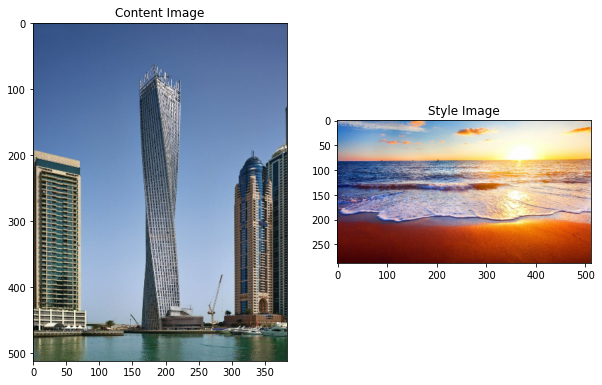

In [234]:
plt.subplot(1,2,1)
imshow(content_image, 'Content Image')
plt.subplot(1,2,2)
imshow(style_image, 'Style Image')

In [0]:
# import tensorflow_hub as hub
# hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
# stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
# tensor_to_image(stylized_image)

In [236]:
x=tf.keras.applications.vgg19.preprocess_input(content_image*255)
x=tf.image.resize(x,(224,224))
vgg=tf.keras.applications.VGG19(include_top=True, weights='imagenet')
predic_prob = vgg(x)
predic_prob.shape

TensorShape([1, 1000])

In [237]:
predic_prob.shape

TensorShape([1, 1000])

In [238]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(predic_prob.numpy())[0]
[(number,class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('n03933933', 'pier', 0.4924588),
 ('n04311004', 'steel_arch_bridge', 0.10262347),
 ('n04366367', 'suspension_bridge', 0.095780015),
 ('n03388043', 'fountain', 0.08553701),
 ('n03344393', 'fireboat', 0.021315262)]

In [239]:
vgg=tf.keras.applications.VGG19(include_top=False, weights='imagenet')

for layer in vgg.layers:
    print(layer.name)

input_18
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [0]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

In [0]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [242]:
num_style_layers

5

In [0]:
def vgg_layers(layer_names):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False  
  outputs = [vgg.get_layer(name).output for name in layer_names]
  model = tf.keras.Model([vgg.input], outputs)
  return model

In [0]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

In [245]:
style_extractor

In [0]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [0]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

In [248]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.13792986
    max:  15445.02
    mean:  747.3666

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  177279.12
    mean:  18643.953

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  606799.06
    mean:  18147.516

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  10566117.0
    mean:  251572.53

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  108712.13
    mean:  1870.2751

Contents:
   block5_conv2
    shape:  (1, 32, 24, 512)
    min:  0.0
    max:  1177.4286
    mean:  13.449626


In [0]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [0]:
image = tf.Variable(content_image)

In [251]:
image

<tf.Variable 'Variable:0' shape=(1, 512, 384, 3) dtype=float32, numpy=
array([[[[0.1764706 , 0.29411766, 0.4901961 ],
         [0.17517138, 0.29281846, 0.4888969 ],
         [0.17254902, 0.2901961 , 0.48627454],
         ...,
         [0.27702206, 0.36329657, 0.5554535 ],
         [0.2784314 , 0.3647059 , 0.5568628 ],
         [0.2784314 , 0.3647059 , 0.5568628 ]],

        [[0.1764706 , 0.29411766, 0.4901961 ],
         [0.1764706 , 0.29411766, 0.4901961 ],
         [0.1800858 , 0.29773286, 0.4938113 ],
         ...,
         [0.2784314 , 0.3647059 , 0.5568628 ],
         [0.2784314 , 0.3647059 , 0.5568628 ],
         [0.2784314 , 0.3647059 , 0.5568628 ]],

        [[0.17506129, 0.29270834, 0.4887868 ],
         [0.1800858 , 0.29773286, 0.4938113 ],
         [0.18447553, 0.3021226 , 0.49820104],
         ...,
         [0.28235295, 0.36862746, 0.56078434],
         [0.2784314 , 0.3647059 , 0.5568628 ],
         [0.2784314 , 0.3647059 , 0.5568628 ]],

        ...,

        [[0.29896122,

In [0]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [0]:
style_weight=1e-2
content_weight=1e4

In [0]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [0]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

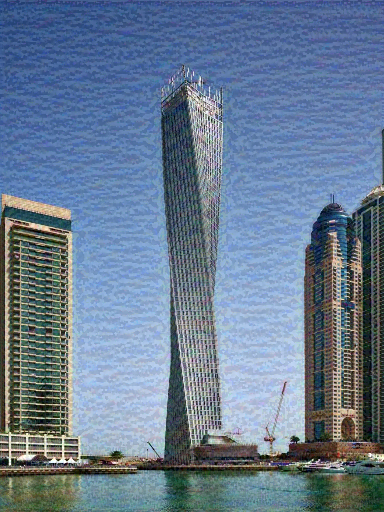

In [258]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

In [222]:
time.time()

1585637480.7336202

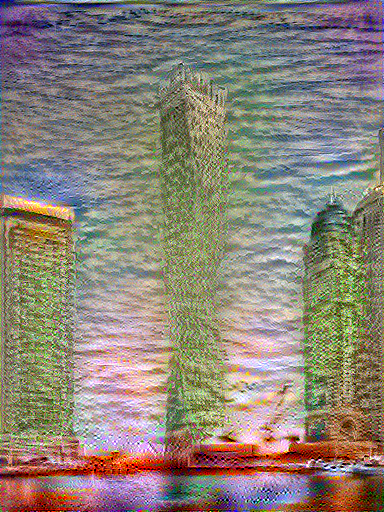

Train step: 200
201202203204205206207208209210211212213214215216217218219220221222223224225226227228229230231232233234235236237238239240241242243244245246247248249250251252253254255256257258259260261262263264265

In [0]:
import time
start = time.time()

epochs = 3
steps_per_epoch = 100

step = 0
i=1
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(i, end='')
    i+=1
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))


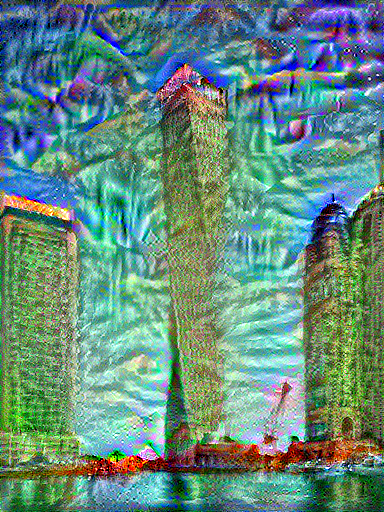

In [224]:
display.display(tensor_to_image(image))

In [0]:
file_name = 'stylized-building.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download(file_name)
